# Languge Detection with machine learning

Languge Detection is a natural languge processing task where you identify the languge of text or document. few years ago machine learning is diffecult of this task becuse don't available huge of languge data. And this time boost internate so human provide your information.

Languge Detection our human easly catch which languge to talk. But our human only some of the languge to know becuse this world not only 5 and 10 languge huge of languge have so i don't catch any of the languge this time hard to me. so same problem machine do batter only train different of languge with label. Real life example every one know google translation provide this featurs.

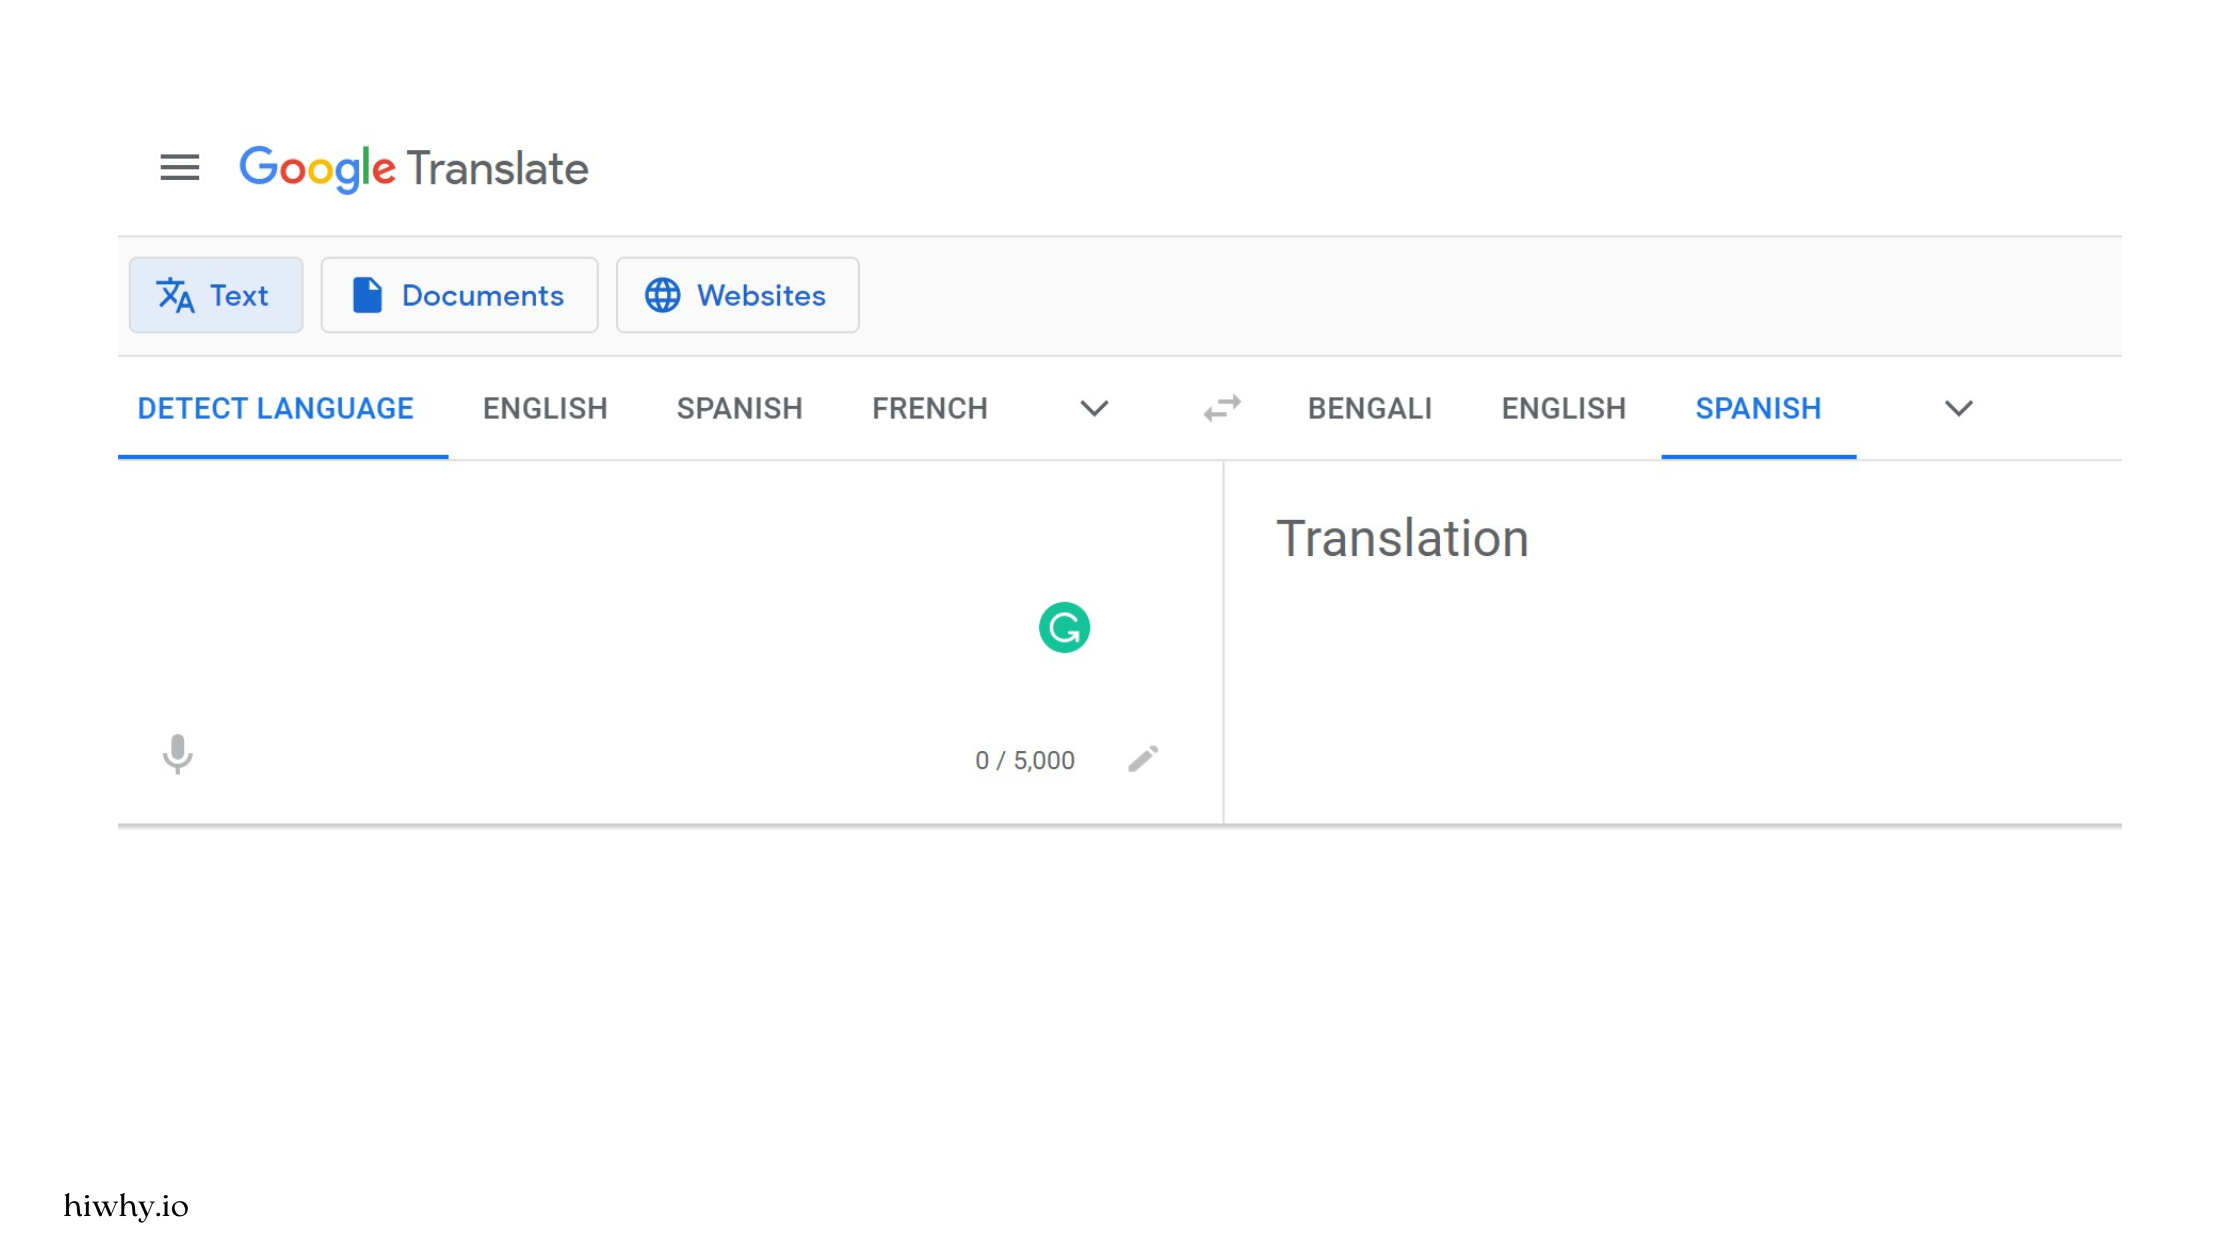

Most importent part is more data you model learn bettar perfomence in real-time. I am using is collect form kaggle. 
if you donwload this dataset follow this link https://www.kaggle.com/datasets/basilb2s/language-detection


## Load Dataset in our Notebook

and some important libary import then use after

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
df = pd.read_csv("/content/drive/MyDrive/Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


Cheack this dataset don't have null value

In [2]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

Cheack to see each language how much text have

In [3]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Frist step Split the dataset Text and Language different variable store that variable convert numpy array. Second step Initilaize CountVectorizer() is complete after put x variable in fit_transform() method in CoutnVectorizer and return Document Tram metrics. now one more step to follow train data set and testing data this time using scikit-learn train_test_split function.

In [4]:
x = np.array(df["Text"])
y = np.array(df["Language"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Now time to model train
our problem related multi-classfication so I use scikit-learn naive baise MultinomialNB() algoritham train language detection data and this allways performence well on multi-classification problem based

In [5]:

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

## Model Evaluate
model is train now time to test data use model performence check how much accuracy provide


In [6]:
model.score(X_test,y_test)

0.9825918762088974

you see model perform verry well 98% accuracy only some simple stape to follow


## Detect Language in Real-Life

create halper function to user input text and covert document tarms metrix after model predict is complete then return the output.


In [7]:
def detect_human_language(input_text):
  data = cv.transform([input_text]).toarray()
  output = model.predict(data)
  return output

### Some of the example you see our model Detect

In [8]:
detect_human_language("देखकर अच्छा लगता है") # put hindi text

array(['Hindi'], dtype='<U10')

In [9]:
detect_human_language("Buenas") # put spanish text

array(['Spanish'], dtype='<U10')

In [10]:
detect_human_language("Hola") # one more put spanish text 

array(['Spanish'], dtype='<U10')

In [11]:
detect_human_language("Guten Abend!") # now put German text

array(['German'], dtype='<U10')